In [7]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [8]:


api = wandb.Api()
sweep = api.sweep("daniel-xiao/algorithm_2_mc/gavl4s4l")
runs = sweep.runs
mc_data = [0] * 10000

for run in runs:
    mc_estimates = run.history(samples=10000)["estimate"].to_list()
    for idx, est in enumerate(mc_estimates):
        mc_data[idx] += est / 20
    
ground_truth = mc_data[-1]
ground_truth

0.8105400000000001

In [9]:
mc = mc_data[:1000]
mc_errors = [abs(x - ground_truth) for x in mc]

In [18]:
api = wandb.Api()
sweep = api.sweep("daniel-xiao/algorithm_2_mod/0k005411")
runs = sweep.runs
bps_data = [0] * 1000

for run in runs:
    bps_estimates = run.history(samples=1000)["estimate"].to_list()
    for idx, est in enumerate(bps_estimates):
        bps_data[idx] += est / 20

bps_errors = [abs(x - ground_truth) for x in bps_data]

In [29]:
api = wandb.Api()
sweep = api.sweep("daniel-xiao/algorithm_3_robust_mod/9w5qngfw")
runs = sweep.runs
robust_data = [0] * 1000

for run in runs:
    robust_estimates = run.history(samples=1000)["estimate"].to_list()
    for idx, est in enumerate(robust_estimates):
        robust_data[idx] += est / 20

robust_errors = [abs(x - ground_truth) for x in robust_data]

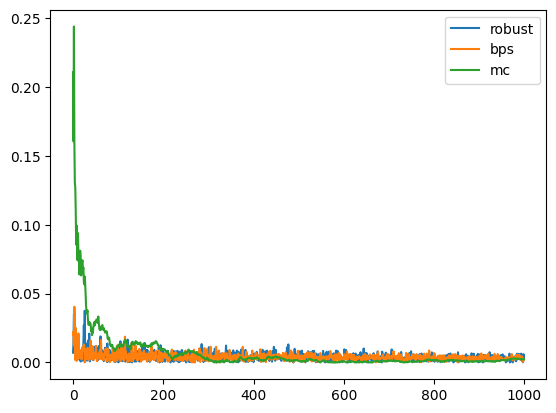

In [30]:
plt.plot([x for x in range(1000)], robust_errors, label="robust")
plt.plot([x for x in range(1000)], bps_errors, label="bps")
plt.plot([x for x in range(1000)], mc_errors, label="mc")
plt.legend()
plt.show()